<a href="https://colab.research.google.com/github/AlwinJose-21/Data-Science-Projects/blob/main/FlightPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/Clean_Dataset.csv')
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [ ]:
data.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
data['flight'].value_counts()

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

In [ ]:
len(data['flight'].value_counts())

1561

In [ ]:
x= data.groupby(['source_city','destination_city'])['price'].sum().reset_index().sort_values(["price"], ascending = False)
x[0:7]

,source_city,destination_city,price
4,Bangalore,Mumbai,299261197
25,Mumbai,Bangalore,298260354
14,Delhi,Mumbai,295931282
29,Mumbai,Kolkata,282022007
27,Mumbai,Delhi,277303264
24,Kolkata,Mumbai,253178558
10,Delhi,Bangalore,250537591


In [ ]:
n=data.groupby(['flight','airline'])['price'].count().reset_index().sort_values(["price"], ascending = False)
n[0:5]

,flight,airline,price
1442,UK-706,Vistara,3235
1454,UK-772,Vistara,2741
1445,UK-720,Vistara,2650
1490,UK-836,Vistara,2542
1477,UK-822,Vistara,2468


<ipython-input-15-9163fd60c66e>:4: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  ax = sns.barplot(x='flight', y='price', hue='airline', data=top_5_flights, palette=colors)


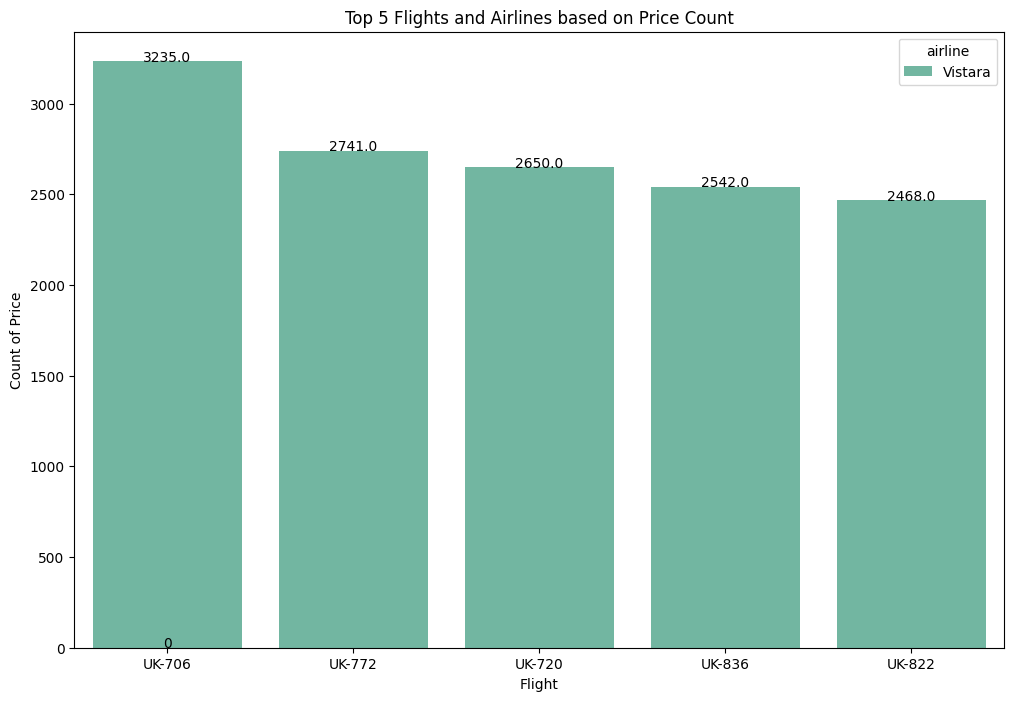

In [ ]:
top_5_flights = n.head(5)
plt.figure(figsize=(12, 8))
colors = sns.color_palette('Set2', len(top_5_flights))
ax = sns.barplot(x='flight', y='price', hue='airline', data=top_5_flights, palette=colors)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.xlabel('Flight')
plt.ylabel('Count of Price')
plt.title('Top 5 Flights and Airlines based on Price Count')
plt.show()

In [ ]:
eco=data[data['class']=='Economy']

In [ ]:
eco['airline'].value_counts()

Vistara      67270
Air_India    47994
Indigo       43120
GO_FIRST     23173
AirAsia      16098
SpiceJet      9011
Name: airline, dtype: int64

Text(0.5, 1.0, 'distibution of most airliens in economy class')

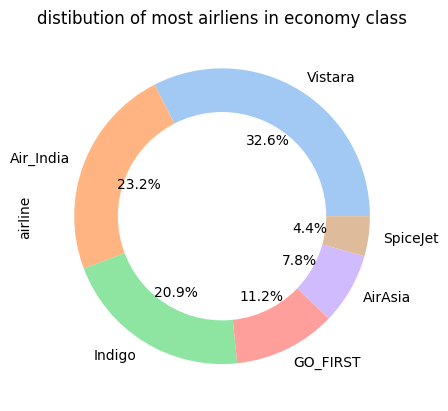

In [ ]:
colors = sns.color_palette('pastel')
eco['airline'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)

my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.title('distibution of most airliens in economy class')

In [ ]:
n=eco.groupby(['airline'])['price'].sum().reset_index().sort_values(by='price',ascending=False)
n

,airline,price
5,Vistara,525173099
1,Air_India,351012862
3,Indigo,229580207
2,GO_FIRST,130973972
0,AirAsia,65858089
4,SpiceJet,55681482


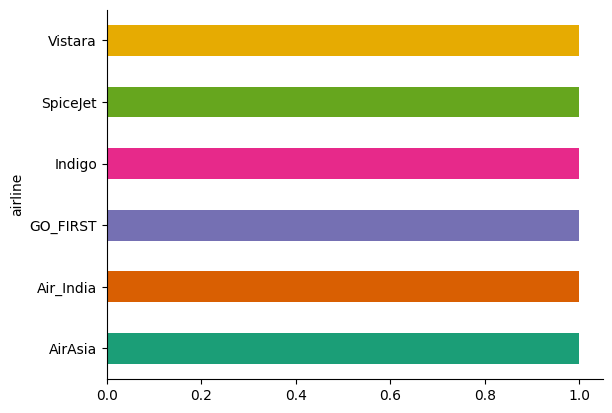

In [ ]:
# @title airline

from matplotlib import pyplot as plt
import seaborn as sns
n.groupby('airline').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-21-e507c0797051>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='airline', y='price', data=n, palette=colors)


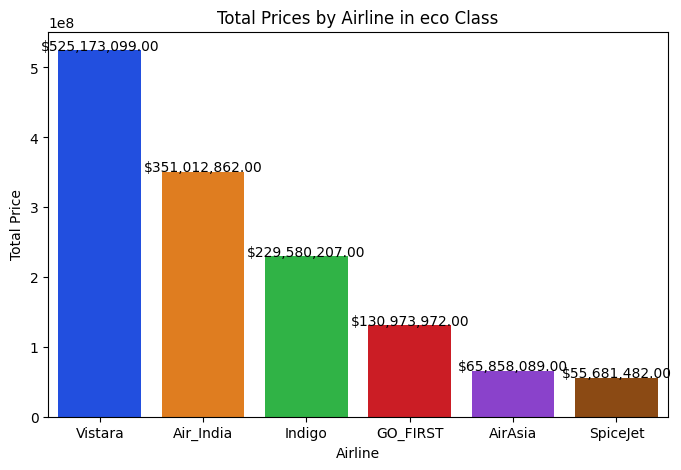

In [ ]:
n = eco.groupby(['airline'])['price'].sum().reset_index().sort_values(by='price', ascending=False)
plt.figure(figsize=(8, 5))
colors = sns.color_palette('bright', len(n))
ax = sns.barplot(x='airline', y='price', data=n, palette=colors)

for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')
plt.xlabel('Airline')
plt.ylabel('Total Price')
plt.title('Total Prices by Airline in eco Class')

plt.show()

Text(0.5, 1.0, 'distrbution of source city in eco class')

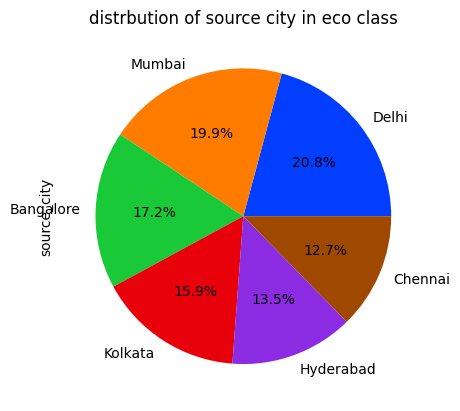

In [ ]:
eco['source_city'].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=colors)
plt.title('distrbution of source city in eco class')

In [ ]:
bus = data[data['class']=='Business']

<Axes: ylabel='airline'>

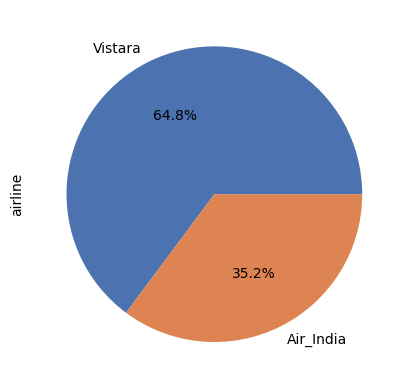

In [ ]:
colors = sns.color_palette('deep')
bus['airline'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)

<ipython-input-26-71ef197a529e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=colors_count.index, y=colors_count.values, palette=colors)


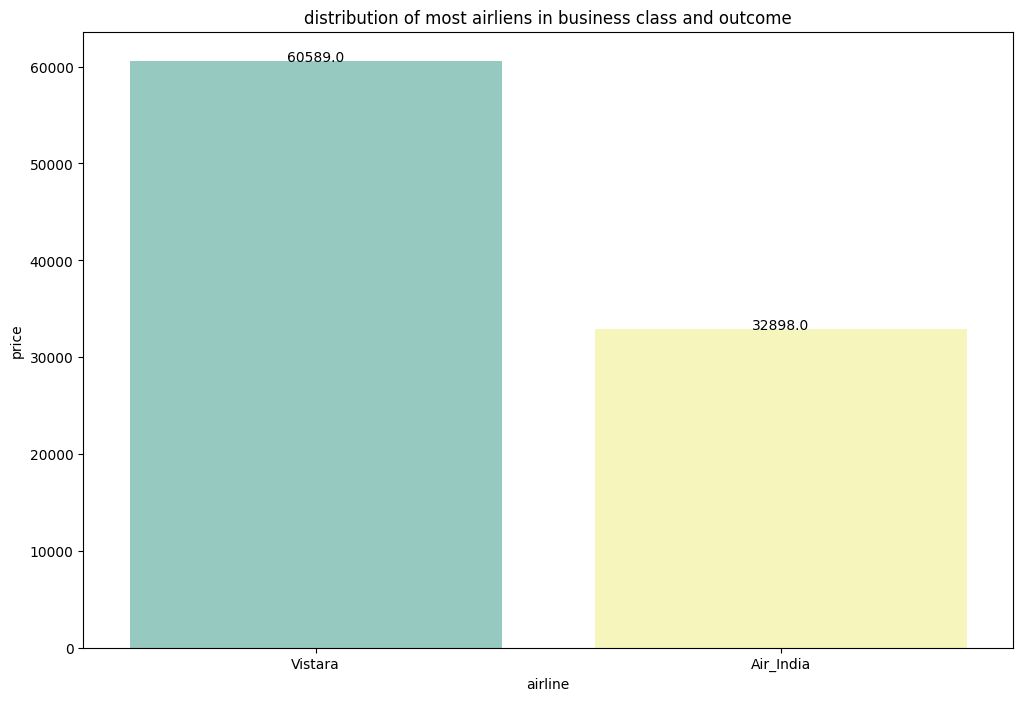

In [ ]:
colors_count = bus['airline'].value_counts()

plt.figure(figsize=(12, 8))
colors = sns.color_palette('Set3', len(colors_count))
ax = sns.barplot(x=colors_count.index, y=colors_count.values, palette=colors)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.xlabel('airline')
plt.ylabel('price')
plt.title('distribution of most airliens in business class and outcome')

plt.show()

In [ ]:
bus.groupby(['airline'])['price'].mean().reset_index().sort_values(by='price', ascending=False)

,airline,price
1,Vistara,55477.027777
0,Air_India,47131.039212


Text(0.5, 1.0, 'distribution of cities used business class tickiets')

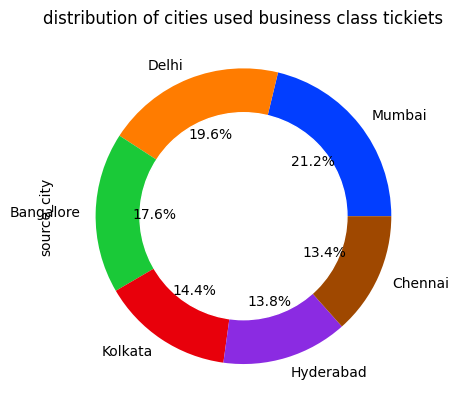

In [ ]:
colors = sns.color_palette('bright')
bus['source_city'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)

my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.title('distribution of cities used business class tickiets')

In [ ]:
df =data.groupby(['airline'])['price'].median()
df

airline
AirAsia       3276.0
Air_India    11520.0
GO_FIRST      5336.0
Indigo        4453.0
SpiceJet      5654.0
Vistara      15543.0
Name: price, dtype: float64

<ipython-input-30-c61a1a90d1a4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dm.index, y=dm, palette=colors)


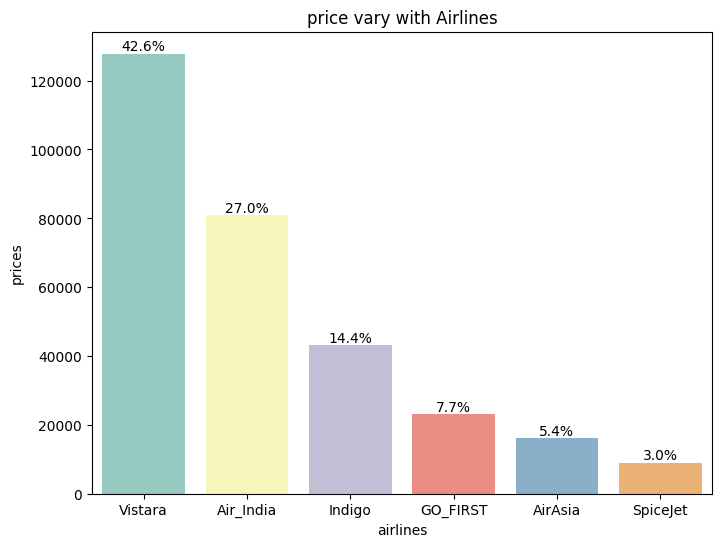

In [ ]:
dm = data['airline'].value_counts()
total_customers = len(data)

percentages = dm / total_customers * 100

# Choose a different color palette from Seaborn
colors = sns.color_palette('Set3', n_colors=len(dm))

plt.figure(figsize=(8, 6))
sns.barplot(x=dm.index, y=dm, palette=colors)

for i, p in enumerate(plt.gca().patches):
    percentage = '{:.1f}%'.format(percentages[i])
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.5
    plt.text(x, y, percentage, ha='center', va='bottom', fontsize=10, color='black')
plt.title('price vary with Airlines')
plt.xlabel('airlines')
plt.ylabel('prices')

plt.show()

<Axes: title={'center': 'vary between class'}, ylabel='price'>

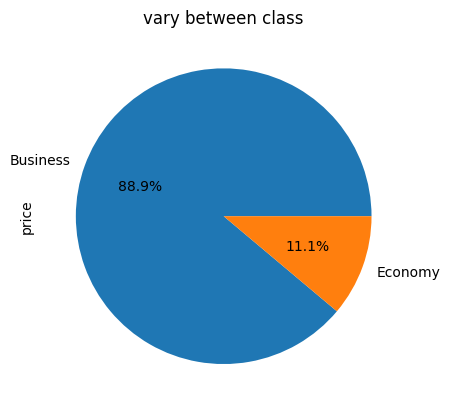

In [ ]:
data.groupby(['class'])['price'].mean().plot(kind='pie',title='vary between class',autopct = "%1.1f%%")

Text(0.5, 1.0, 'airline prices based on Arrival Time')

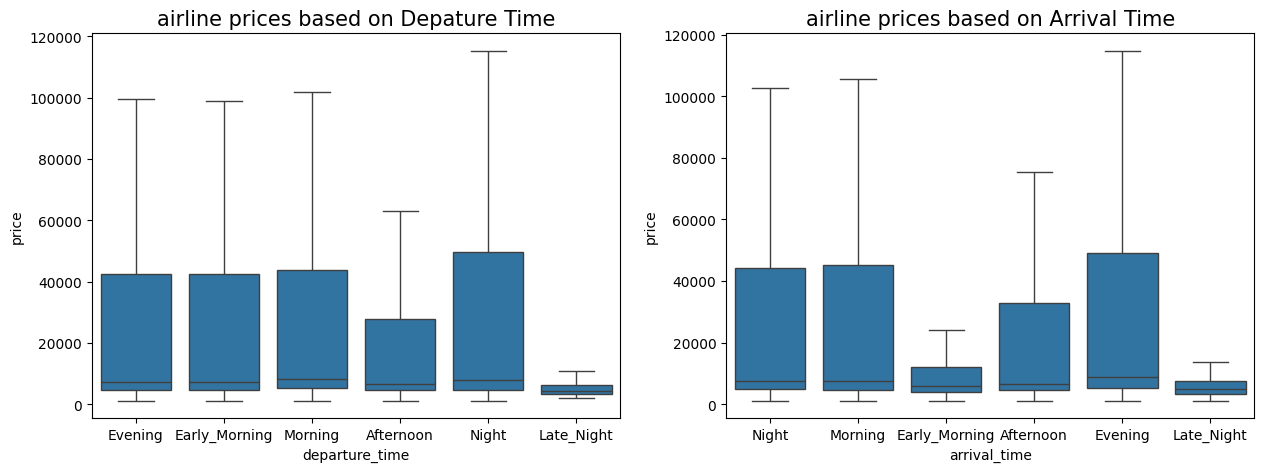

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=data, x='departure_time',y='price',showfliers=False).set_title('airline prices based on Depature Time',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=data,x='arrival_time',y ='price',showfliers=False).set_title('airline prices based on Arrival Time',fontsize=15)

Text(0.5, 0.98, 'price vary with source and destination city')

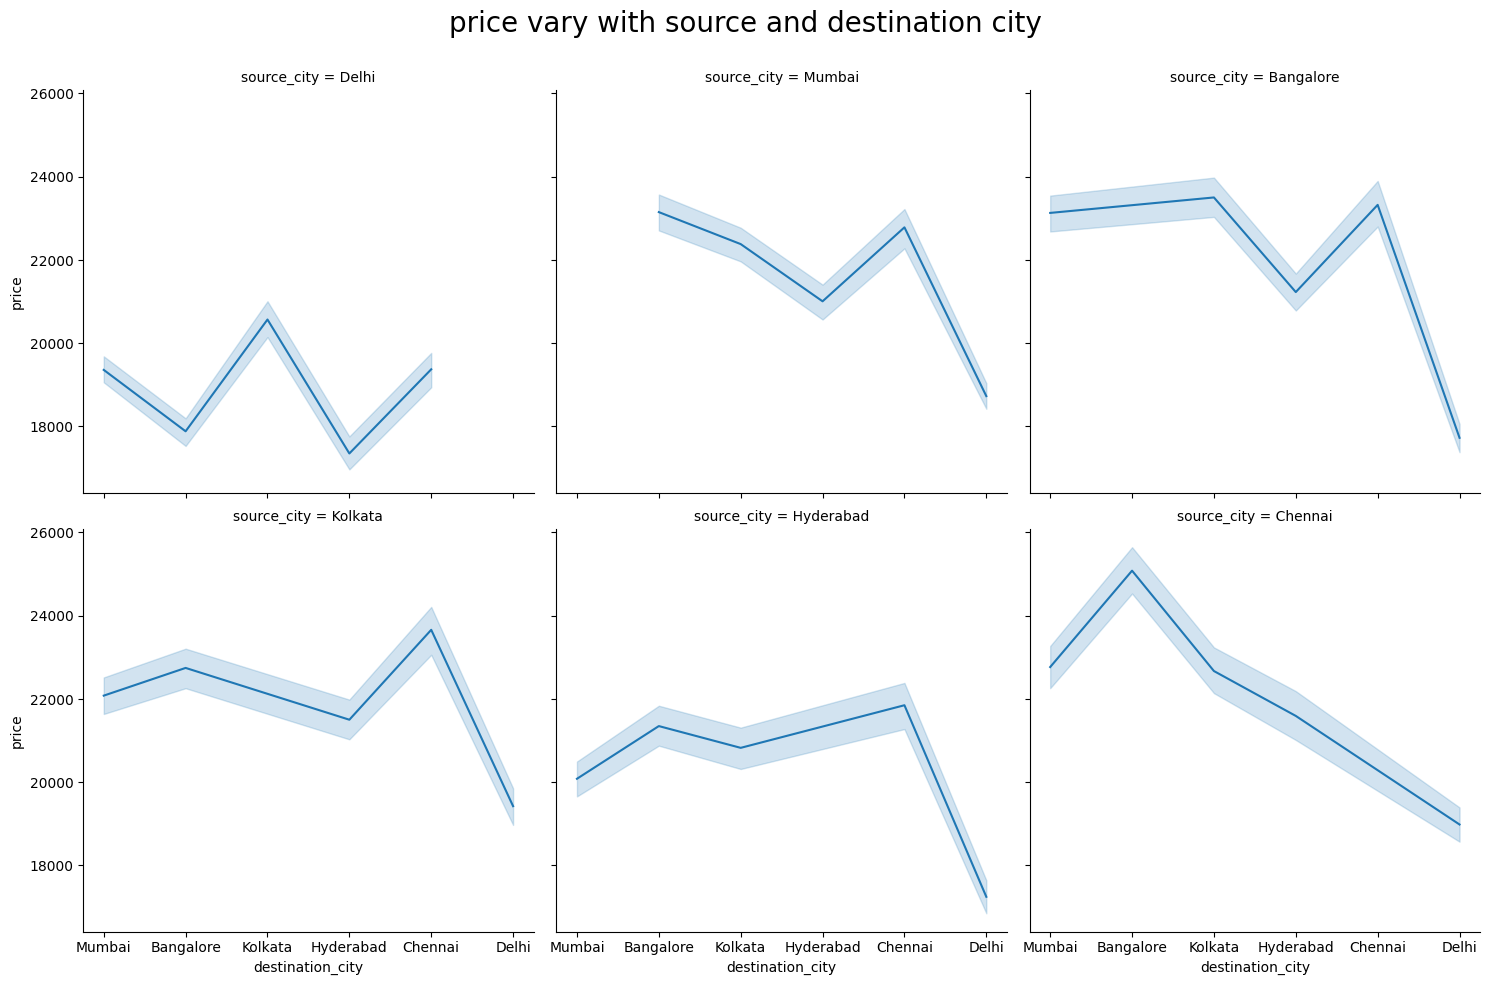

In [ ]:
mx = sns.relplot(col ='source_city',y='price',kind = 'line',x='destination_city',data=data,col_wrap=3 )
mx.fig.subplots_adjust(top=0.9)
mx.fig.suptitle('price vary with source and destination city', fontsize=20)

<Axes: xlabel='airline', ylabel='price'>

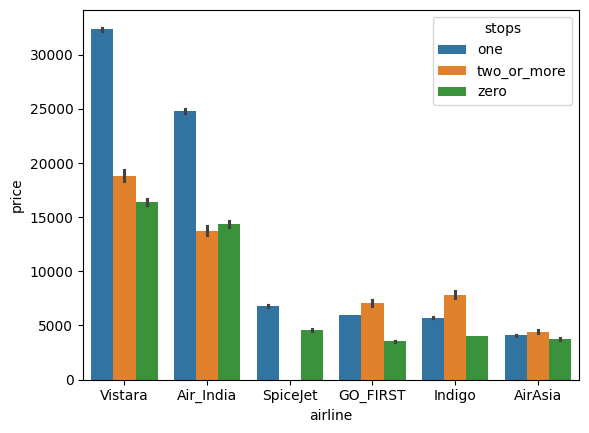

In [ ]:
sns.barplot(y = "price", x = "airline",hue="stops",data = data .sort_values("price", ascending = False))

In [ ]:
df=data.copy()

In [ ]:
data['source_to_destionation']=data['source_city']+' to '+data['destination_city']
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,source_to_destionation
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi to Mumbai
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi to Mumbai
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi to Mumbai
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi to Mumbai
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi to Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai to Hyderabad
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai to Hyderabad
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai to Hyderabad
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai to Hyderabad


In [ ]:
data.groupby(['source_to_destionation','airline'])['price'].size().reset_index().sort_values(by='price',ascending=False)

,source_to_destionation,airline,price
89,Delhi to Mumbai,Vistara,5840
165,Mumbai to Delhi,Vistara,5812
11,Bangalore to Delhi,Vistara,5423
29,Bangalore to Mumbai,Vistara,5380
65,Delhi to Bangalore,Vistara,5379
...,...,...,...
46,Chennai to Hyderabad,SpiceJet,51
44,Chennai to Hyderabad,GO_FIRST,38
97,Hyderabad to Chennai,GO_FIRST,38
16,Bangalore to Hyderabad,SpiceJet,31


In [ ]:
m=data.groupby(['source_to_destionation'])['price'].mean().reset_index().sort_values(by='price',ascending=False)
m[0:5]

,source_to_destionation,price
5,Chennai to Bangalore,25081.850454
21,Kolkata to Chennai,23660.361040
3,Bangalore to Kolkata,23500.061229
0,Bangalore to Chennai,23321.850078
25,Mumbai to Bangalore,23147.873807


<ipython-input-39-7270320f20de>:4: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(x='source_to_destionation',hue='stops',data=data,palette=colors)


<Figure size 640x480 with 0 Axes>

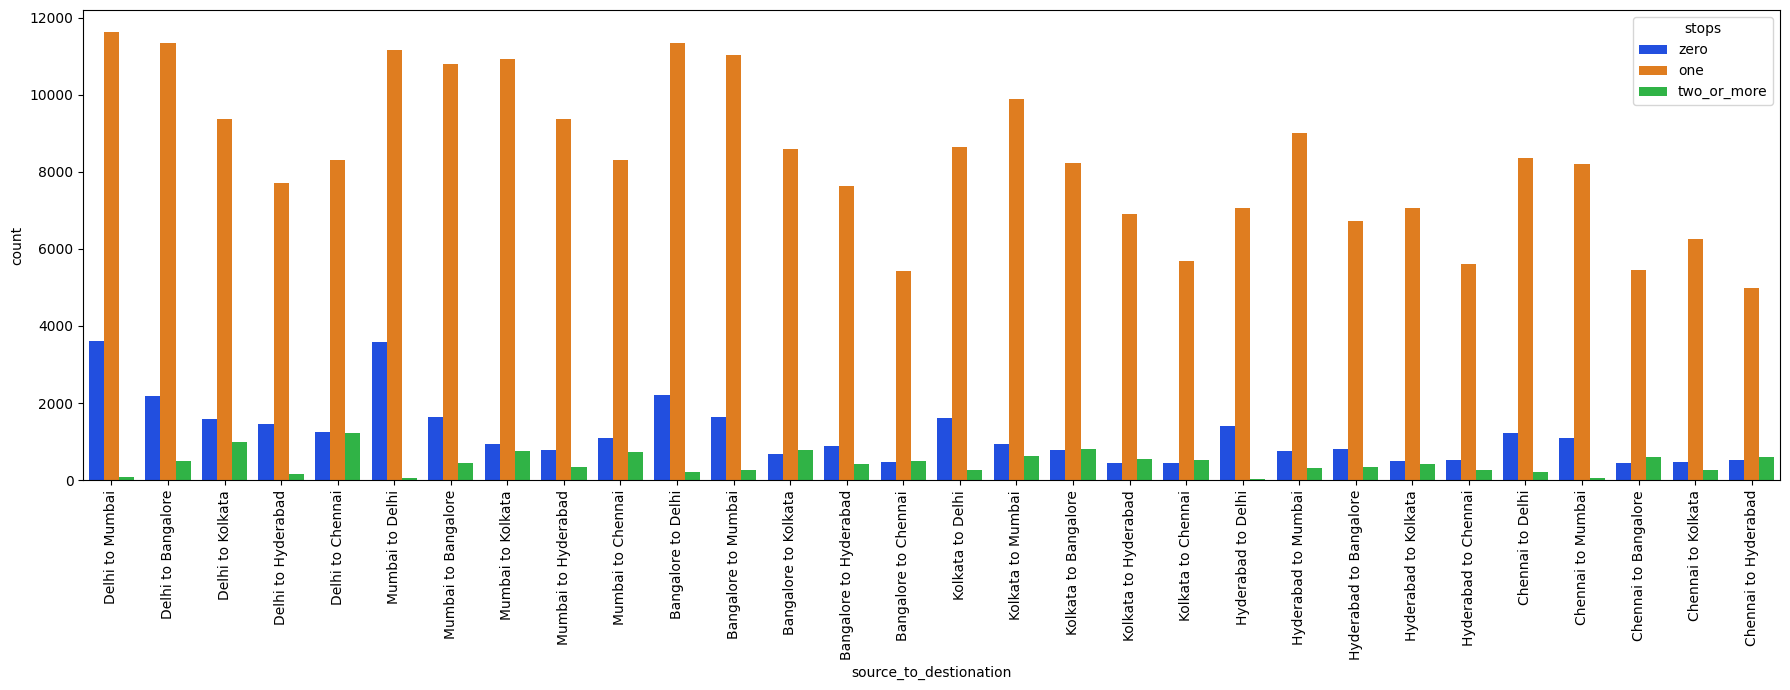

In [ ]:
colors=sns.color_palette('bright')
plt.clf()
plt.figure(figsize=(18,7))
sns.countplot(x='source_to_destionation',hue='stops',data=data,palette=colors)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
dn =data.groupby(['days_left'])['price'].mean()

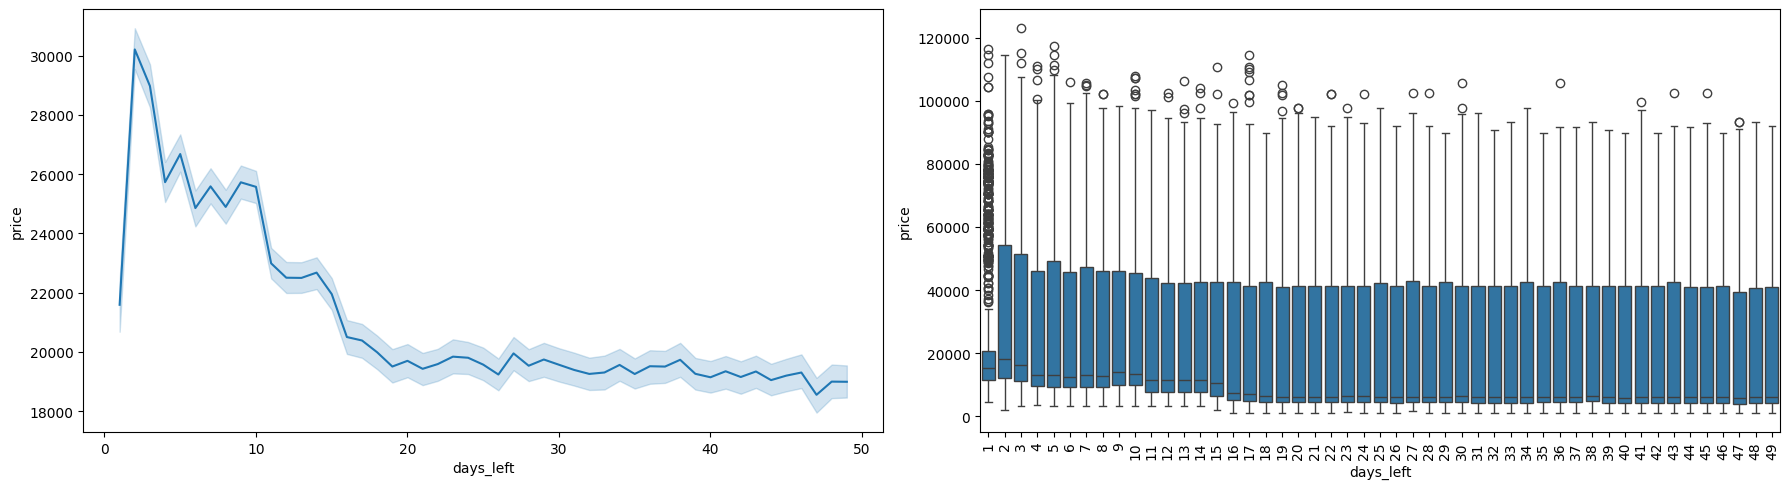

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(18,5))
plt.tight_layout()
sns.lineplot(x= 'days_left' ,y='price',data=data,ax=axs[0])
sns.boxplot(y='price',x='days_left',data=data,ax=axs[1])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
data['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [ ]:
def offer(x):
    if x['days_left']==1:
        return ("5%offer")
    elif x['days_left']>=2 and x['days_left']<=8:
        return('7%offer')
    elif x['days_left']>8 and x['days_left']>=15:
        return('10%offer')
    else:
        return('no offer')

data['offer']=data.apply(offer,axis=1)

<Axes: ylabel='offer'>

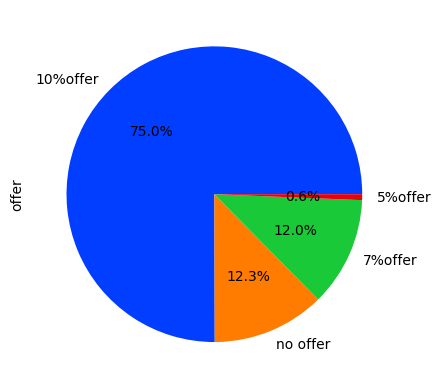

In [ ]:
data['offer'].value_counts().plot(kind='pie',autopct = "%1.1f%%",colors = colors)

In [ ]:
city_count=dict(data['source_city'].value_counts())
city_count

{'Delhi': 61343,
 'Mumbai': 60896,
 'Bangalore': 52061,
 'Kolkata': 46347,
 'Hyderabad': 40806,
 'Chennai': 38700}

In [ ]:
def offer_city(count):
    if  count>=60000:
        return('offer5%')
    if   45000 <= count < 60000:
         return('offer7%')
    if   30000<= count <45000:
        return('offer10%')
    else:
        return('no offer')
data['offer_city']=data['source_city'].map(city_count).apply(offer_city)

In [ ]:
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,source_to_destionation,offer,offer_city
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi to Mumbai,5%offer,offer5%
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi to Mumbai,5%offer,offer5%
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi to Mumbai,5%offer,offer5%
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi to Mumbai,5%offer,offer5%
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi to Mumbai,5%offer,offer5%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai to Hyderabad,10%offer,offer10%
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai to Hyderabad,10%offer,offer10%
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai to Hyderabad,10%offer,offer10%
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai to Hyderabad,10%offer,offer10%


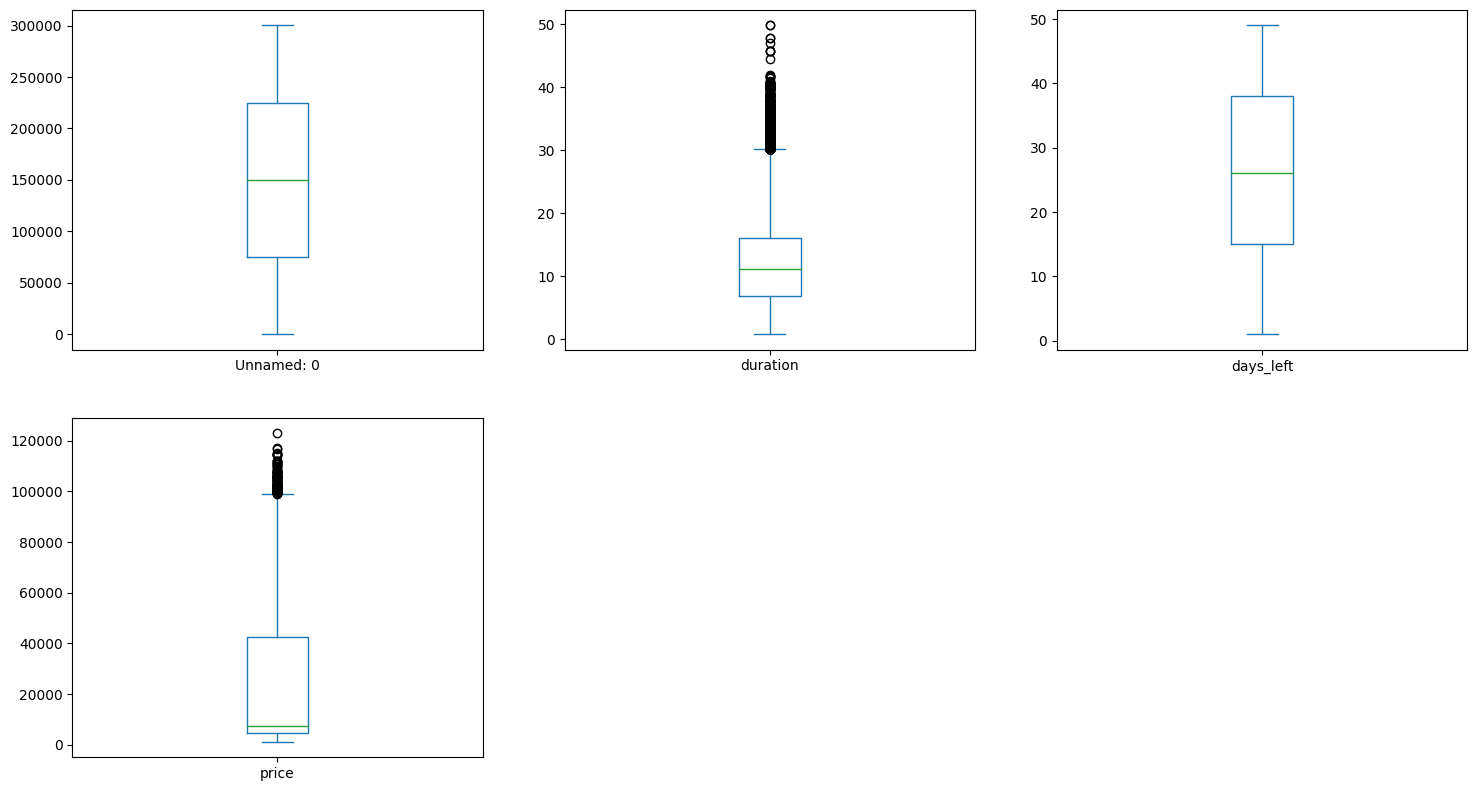

In [ ]:
# PREPROCESSING
data.plot(kind='box',subplots = True,layout=(3,3),figsize=(18,15))
plt.show()

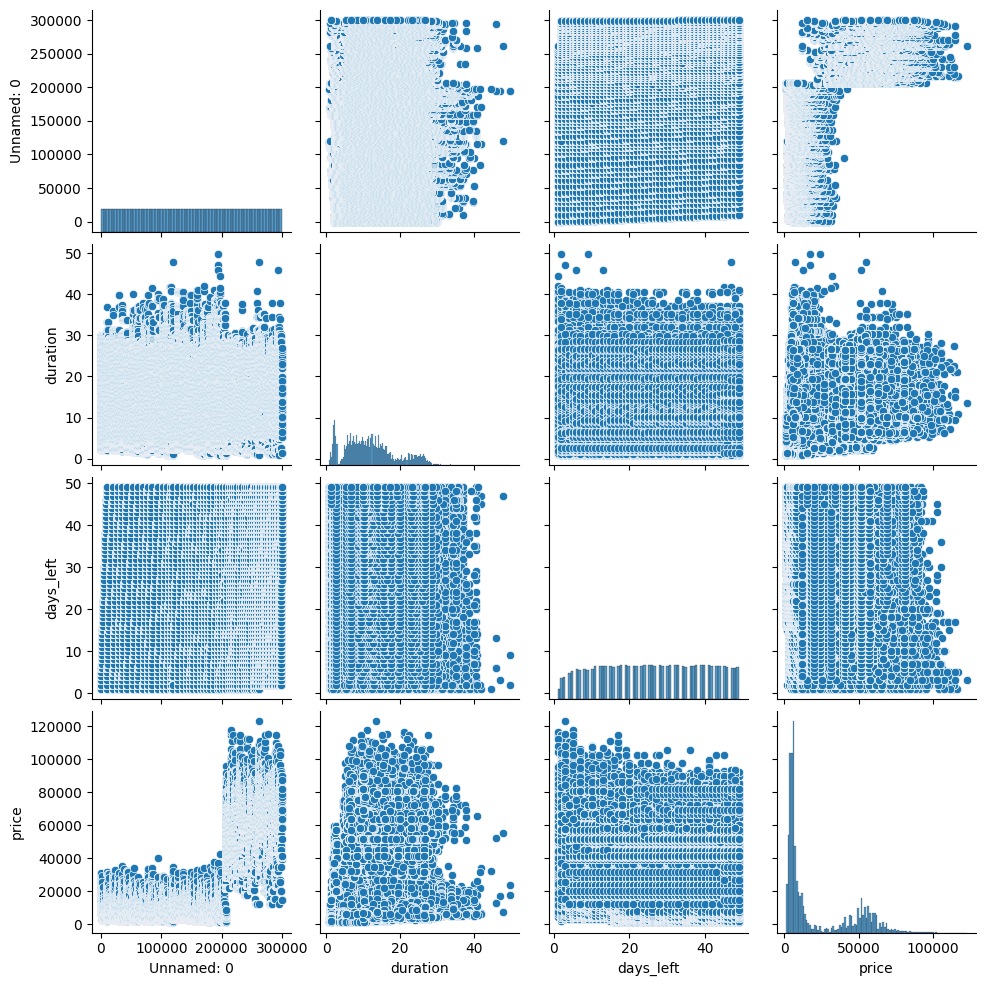

In [ ]:
sns.pairplot(df)

In [ ]:
duplicated=data.duplicated()
duplicated.sum()

0

In [ ]:
df.describe(include='object')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [ ]:
df['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
airline = LabelEncoder()
stops=LabelEncoder()
clas=LabelEncoder()

In [ ]:
df['airline']=airline.fit_transform(df['airline'])
df['source_city']=airline.fit_transform(df['source_city'])
df['destination_city']=airline.fit_transform(df['destination_city'])
df['departure_time']=airline.fit_transform(df['departure_time'])
df['arrival_time']=airline.fit_transform(df['arrival_time'])
df['stops']=stops.fit_transform(df['stops'])
df['class']=clas.fit_transform(df['class'])

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.drop(['flight'],axis=1,inplace=True)

In [ ]:
df['airline'].value_counts()

5    127859
1     80892
3     43120
2     23173
0     16098
4      9011
Name: airline, dtype: int64

In [ ]:
df.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,3.104873,2.577592,2.417337,0.284168,3.074086,2.588303,0.688536,12.221021,26.004751,20889.660523
std,1.833265,1.751762,1.754276,0.665825,1.741666,1.744543,0.463093,7.191997,13.561004,22697.767366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,6.830000,15.000000,4783.000000
50%,3.000000,2.000000,2.000000,0.000000,4.000000,3.000000,1.000000,11.250000,26.000000,7425.000000
75%,5.000000,4.000000,4.000000,0.000000,5.000000,4.000000,1.000000,16.170000,38.000000,42521.000000
max,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,1.000000,49.830000,49.000000,123071.000000


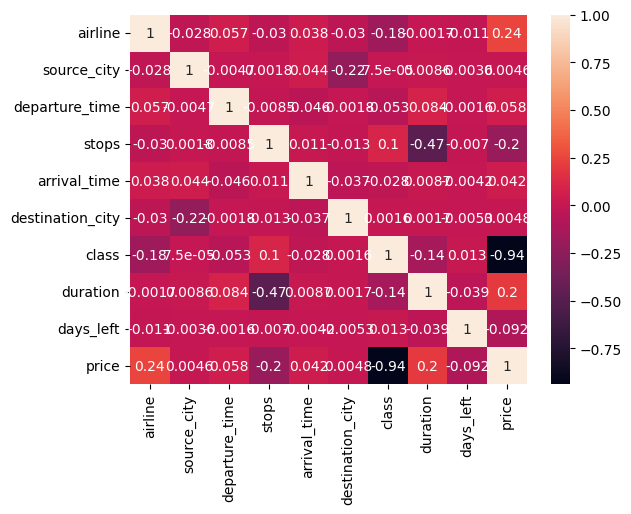

<Figure size 2000x2000 with 0 Axes>

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=(20,20))
plt.show()

In [ ]:
df.mean()

airline                 3.104873
source_city             2.577592
departure_time          2.417337
stops                   0.284168
arrival_time            3.074086
destination_city        2.588303
class                   0.688536
duration               12.221021
days_left              26.004751
price               20889.660523
dtype: float64

In [ ]:
x_temp = df.drop(['price'],axis=1).values
y=df['price'].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming x_temp is a NumPy array
scaler = MinMaxScaler().fit_transform(x_temp)
X = pd.DataFrame(scaler)

In [ ]:
X.describe().T[['min', 'mean', 'std', '50%', 'max']].style.background_gradient(axis=1)

,min,mean,std,50%,max
0,0.000000,0.620975,0.366653,0.600000,1.000000
1,0.000000,0.515518,0.350352,0.400000,1.000000
2,0.000000,0.483467,0.350855,0.400000,1.000000
3,0.000000,0.142084,0.332912,0.000000,1.000000
4,0.000000,0.614817,0.348333,0.800000,1.000000
5,0.000000,0.517661,0.348909,0.600000,1.000000
6,0.000000,0.688536,0.463093,1.000000,1.000000
7,0.000000,0.232470,0.146775,0.212653,1.000000
8,0.000000,0.520932,0.282521,0.520833,1.000000


In [ ]:
X.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [ ]:
#MODELING
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
X_train.shape

(210107, 9)

In [ ]:
y_test.shape

(90046,)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
LR = linear_model.LinearRegression()
LR.fit(X_train,y_train)
print('train score',LR.score(X_train,y_train))
print('test score',LR.score(X_test,y_test))
y_pred = LR.predict(X_test)
R2_LR=r2_score(y_test,y_pred)
print('r2 score',r2_score(y_test,y_pred))
MAE_LR=mean_absolute_error(y_test,y_pred)
print('MAE',mean_absolute_error(y_test,y_pred))
MSE_LR=mean_squared_error(y_test,y_pred)
print('MSE',mean_squared_error(y_test,y_pred))
MAPR_LR=mean_absolute_percentage_error(y_test,y_pred)
print('MAPR',mean_absolute_percentage_error(y_test,y_pred))

train score 0.9045877099195366
test score 0.9046540517018563
r2 score 0.9046540517018563
MAE 4626.099183664042
MSE 49071365.664414555
MAPR 0.437523716821856
